In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Load dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target
feature_names = X.columns


In [3]:
# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 3: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Step 4: Polynomial transform (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)

In [6]:
# Step 5: Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [7]:
# Step 6: Prepare for plotting
mean_features = np.mean(X_train_scaled, axis=0)
n_features = X.shape[1]

In [ ]:
# Subplot grid setup
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))
print(n_rows)


4


<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

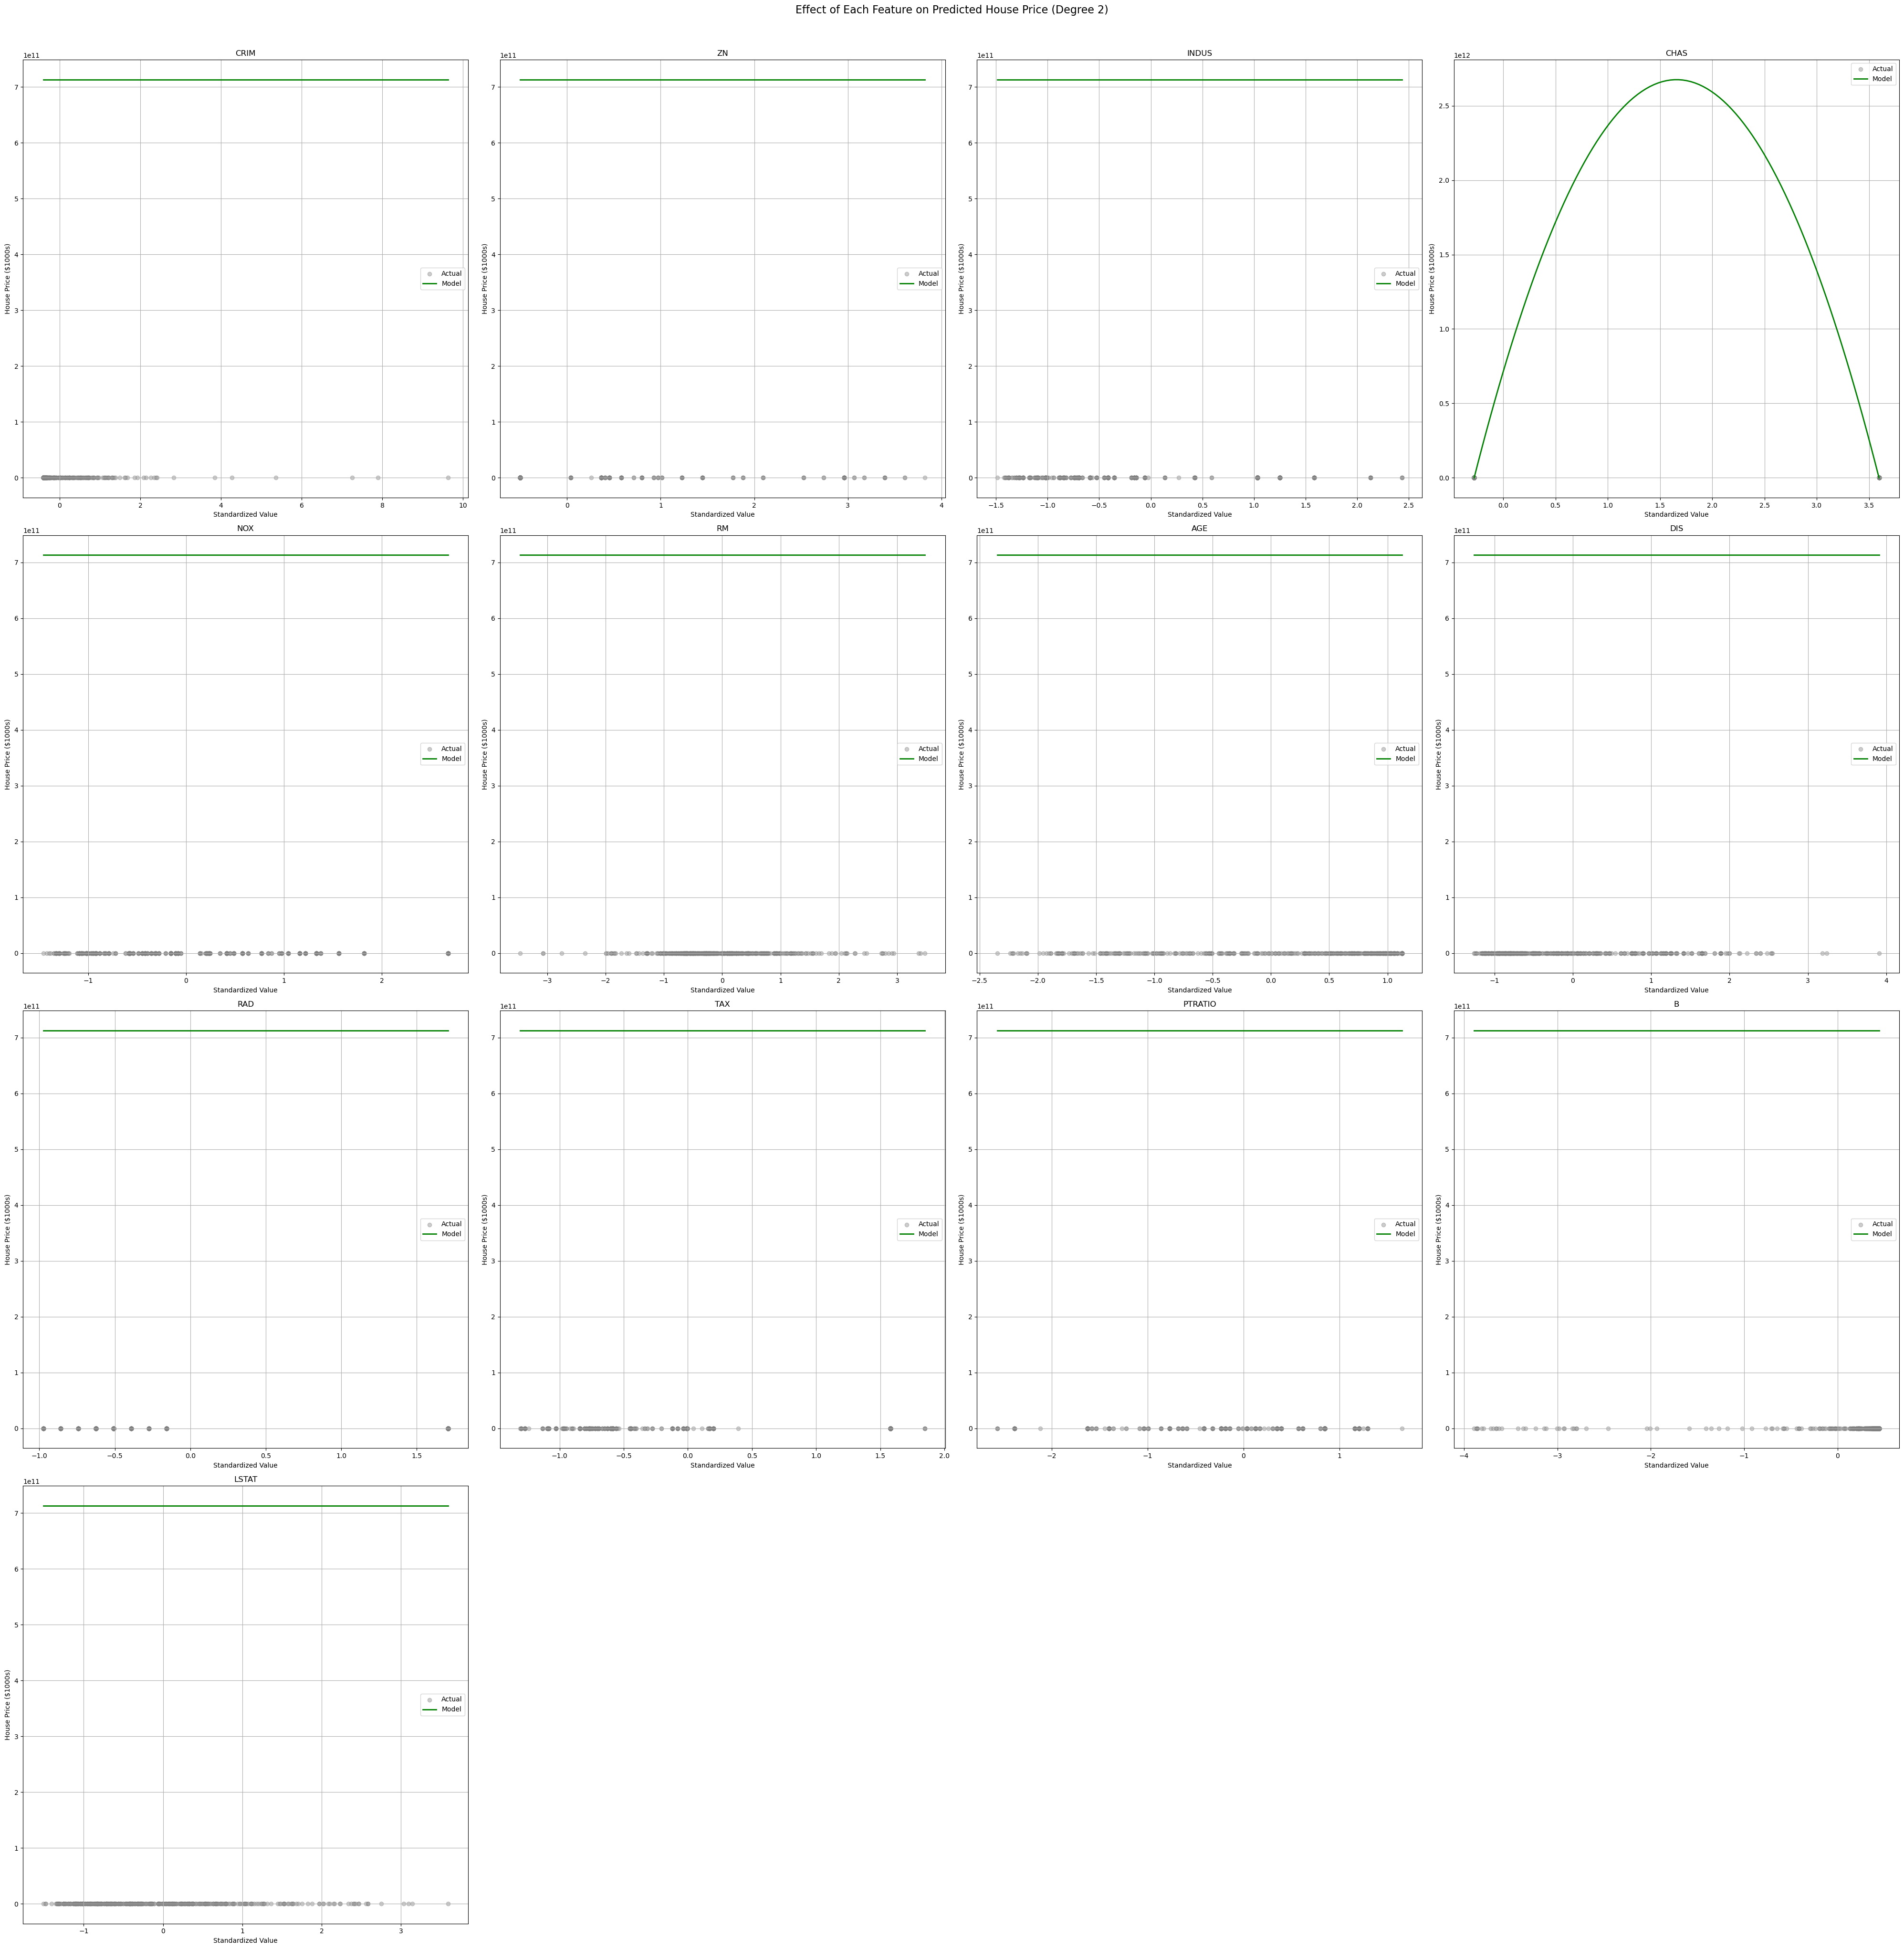

In [11]:
plt.figure(figsize=(n_cols * 10, n_rows * 10))
# Step 7: Plot predictions for each feature
for idx in range(n_features):
    # Generate range for selected feature
    f_vals = np.linspace(
        X_train_scaled[:, idx].min(),
        X_train_scaled[:, idx].max(),
        100
    ).reshape(-1, 1)

    # Duplicate mean feature vector and replace one column
    X_plot = np.tile(mean_features, (100, 1))
    X_plot[:, idx] = f_vals.flatten()

    # Transform and predict
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    # Plot
    plt.subplot(n_rows, n_cols, idx + 1)

    # Scatter: actual data
    plt.scatter(X_train_scaled[:, idx], y_train, color='gray', alpha=0.4, label='Actual')
    
    # Line: model prediction
    plt.plot(f_vals, y_plot, color='green', linewidth=2, label='Model')

    plt.title(feature_names[idx])
    plt.xlabel('Standardized Value')
    plt.ylabel('House Price ($1000s)')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle('Effect of Each Feature on Predicted House Price (Degree 2)', fontsize=16, y=1.02)
plt.show()